In [4]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Installing pydicom

!pip install pydicom

In [6]:
#installing the libraries:

import pandas as pd
import numpy as np
import pydicom
from glob import glob
import glob2
from tqdm import tqdm
import shutil
import os
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import tensorflow as tf
import keras
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import random as rn
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, Callback

In [8]:
import os

# import efficientnet.tfkeras as efn
import numpy as np
import pandas as pd
#from kaggle_datasets import KaggleDatasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
# import tensorflow.keras.applications.efficientnet as efn


import tensorflow as tf
from tensorflow.keras import Sequential
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D

In [9]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter/notebook

In [10]:
%cd /content/drive/MyDrive/Self \Case \Study \2/DATASET/ 

/content/drive/MyDrive/Self Case Study 2/DATASET


In [11]:
final_train_df = pd.read_csv('Train Dataset/siim/final_train_data.csv')
final_train_df.head(2)

,ImageId,EncodedPixels,ImagePath,MaskPath,ImagePath_Png
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....


In [12]:
imagePath = 'Train Dataset/siim/train_png_images/'
maskPath = 'Train Dataset/siim/train_mask_png_images/'

In [13]:
final_train_df['Target'] = final_train_df[' EncodedPixels'].apply(lambda x : 0 if x == '-1' else 1)

In [14]:
final_train_df.head(2)

,ImageId,EncodedPixels,ImagePath,MaskPath,ImagePath_Png,Target
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....,0
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....,1


In [15]:
imagePath = final_train_df['ImagePath_Png']
#targetLabels = final_train_df['Target'].values

In [16]:
imagePath

0        Train Dataset/siim/train_png_images/1.2.276.0....
1        Train Dataset/siim/train_png_images/1.2.276.0....
2        Train Dataset/siim/train_png_images/1.2.276.0....
3        Train Dataset/siim/train_png_images/1.2.276.0....
4        Train Dataset/siim/train_png_images/1.2.276.0....
                               ...                        
12042    Train Dataset/siim/train_png_images/1.2.276.0....
12043    Train Dataset/siim/train_png_images/1.2.276.0....
12044    Train Dataset/siim/train_png_images/1.2.276.0....
12045    Train Dataset/siim/train_png_images/1.2.276.0....
12046    Train Dataset/siim/train_png_images/1.2.276.0....
Name: ImagePath_Png, Length: 12047, dtype: object

In [17]:
load_dir = os.getcwd()
print(load_dir)

/content/drive/My Drive/Self Case Study 2/DATASET


In [ ]:
paths = "Train Dataset/siim/train_png_images/" + final_train_df['ImageId'] + '.png'

In [ ]:
paths

0        Train Dataset/siim/train_png_images/1.2.276.0....
1        Train Dataset/siim/train_png_images/1.2.276.0....
2        Train Dataset/siim/train_png_images/1.2.276.0....
3        Train Dataset/siim/train_png_images/1.2.276.0....
4        Train Dataset/siim/train_png_images/1.2.276.0....
                               ...                        
12042    Train Dataset/siim/train_png_images/1.2.276.0....
12043    Train Dataset/siim/train_png_images/1.2.276.0....
12044    Train Dataset/siim/train_png_images/1.2.276.0....
12045    Train Dataset/siim/train_png_images/1.2.276.0....
12046    Train Dataset/siim/train_png_images/1.2.276.0....
Name: ImageId, Length: 12047, dtype: object

In [18]:
#label_cols = final_train_df.columns[5:]
labels = final_train_df["Target"]

In [19]:
labels

0        0
1        1
2        0
3        1
4        1
        ..
12042    0
12043    1
12044    1
12045    0
12046    0
Name: Target, Length: 12047, dtype: int64

In [20]:
labels.shape

(12047,)

In [17]:
type(labels)

pandas.core.series.Series

In [ ]:
targetLabels

array(['-1', '1', '-1', ..., '1', '-1', '-1'], dtype=object)

In [ ]:
targetLabels.shape[0]

12047

In [21]:
trainPath, validPath, trainLabels, validLabels = train_test_split(imagePath, labels, test_size = 0.1, random_state = 27, stratify=labels)

In [22]:
print('Total Train Dataset Size : ', trainPath.shape[0])
print('Total Valid Dataset Size : ', validPath.shape[0])

Total Train Dataset Size :  10842
Total Valid Dataset Size :  1205


In [23]:
trainLabels

5943     0
1455     0
1631     0
10874    0
727      0
        ..
2574     1
4568     0
9675     0
10061    0
335      0
Name: Target, Length: 10842, dtype: int64

In [24]:
trainCount=trainLabels.value_counts()
validCount = validLabels.value_counts()

In [25]:
totalTrainCount = trainLabels.shape[0]
totalPosCount = trainCount[1]
totalNegCount = trainCount[0]

print('Total Train Labels : ', totalTrainCount)
print('Total Train Positive Labels : ', totalPosCount)
print('Total Train Negative Labels : ', totalNegCount)

Total Train Labels :  10842
Total Train Positive Labels :  2402
Total Train Negative Labels :  8440


In [26]:
posFreq = round((totalPosCount/totalTrainCount),2)
negFreq = round((totalNegCount/totalTrainCount),2)

print('Frequency Of Positive Class : ', posFreq)
print('Frequency Of Negataive Class : ', negFreq)

Frequency Of Positive Class :  0.22
Frequency Of Negataive Class :  0.78


In [27]:
pos_weights = negFreq
neg_weights = posFreq

In [125]:
type(pos_weights)

numpy.float64

In [28]:
pos_contribution = posFreq * pos_weights
neg_contribution = negFreq * neg_weights

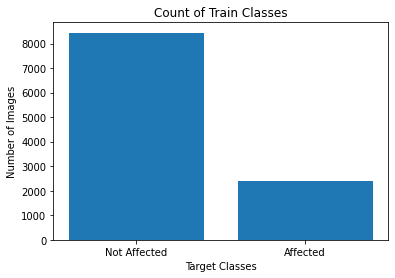

In [143]:

classes = ['Not Affected', 'Affected']
count = [totalNegCount,totalPosCount]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Number of Images')
plt.title('Count of Train Classes')
plt.show()

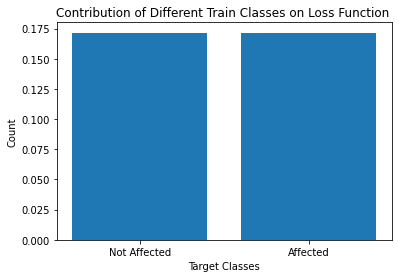

In [144]:
classes = ['Not Affected', 'Affected']
count = [neg_contribution,pos_contribution]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Contribution of Different Train Classes on Loss Function ')
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/Test Dataset/stage_2_sample_submission.csv')
df.head(2)

,ImageId,EncodedPixels
0,ID_c68e114ba,-1
1,ID_b5a797789,-1


In [ ]:
label_cols

Index(['ImagePath', 'MaskPath', 'ImagePath_Png', 'Target'], dtype='object')

In [ ]:
type(targetLabels)

numpy.ndarray

In [46]:
import imgaug.augmenters as iaa

augment1 = iaa.Fliplr(1)
augment2 = iaa.Flipud(1)
augment3 = iaa.Emboss(alpha=(1), strength=1)
augment4 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
augment5 = iaa.Sharpen(alpha=(1.0), lightness=(1.5))

In [52]:
import random

In [111]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter/output?select=submission.csv
#https://www.tensorflow.org/tutorials/images/data_augmentation

def build_decoder(with_labels=True, target_size=(300, 300)):
    def decode(path):
        file_bytes = tf.io.read_file(path)
        img = tf.image.decode_png(file_bytes, channels=3)
        img = tf.cast(img, tf.float32) / 255.0
        img = tf.image.resize(img, target_size)

        return img
    
    def decode_with_labels(path, label):
        return decode(path), label
    
    return decode_with_labels if with_labels else decode

def build_augmenter(with_labels=True):
    def augment(img):
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)
        if number == 2:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)
        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)
        if number == 4:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_hue(img, 0.2,seed)
        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)
        return img
    
    def augment_with_labels(img, label):
        return augment(img), label
    
    return augment_with_labels if with_labels else augment

def build_dataset(paths, labels=None, bsize=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=True, repeat=True, shuffle=1024,cache_dir=""):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)
    
    if augment_fn is None:
        augment_fn = build_augmenter(labels is not None)
    
    AUTO = tf.data.experimental.AUTOTUNE
    slices = paths if labels is None else (paths, labels)
    
    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.map(decode_fn, num_parallel_calls=AUTO)
    dset = dset.map(augment_fn, num_parallel_calls=AUTO) if augment else dset
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)
    
    return dset

In [112]:
decoder = build_decoder(with_labels=True, target_size=(256, 256))

In [103]:
decoder

<function __main__.build_decoder.<locals>.decode_with_labels>

In [113]:
dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, decode_fn=decoder,cache_dir='/Kaggle/tf_cache'
)

In [102]:
dtrain

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>

In [114]:
dvalid = build_dataset(
    validPath, validLabels, bsize=16, 
    repeat=False, shuffle=False, augment=False, decode_fn=decoder,cache_dir='/Kaggle/tf_cache'
)

In [104]:
dvalid

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
3. ChexNet

In [142]:
class_weight = {0: neg_weights, 1: pos_weights}

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

data_gen_args = dict(rescale=1./255, 
                     #preprocessing_function=apply_adaptive_histogram_equalization,
                     rotation_range=10,
                     fill_mode='nearest',
                     brightness_range=[0.4,1.5],
                     zoom_range=0.3,
                     shear_range=0.2,
                    width_shift_range=0.01,
                    horizontal_flip=True,
                     validation_split=0.2,
                     height_shift_range=0.01)

mask_gen_args = dict(rescale=1./255,
                    rotation_range=10,
                    fill_mode='nearest',
                     brightness_range=[0.4,1.5],
                     zoom_range=0.3,
                     shear_range=0.2,
                    width_shift_range=0.01,
                    horizontal_flip=True,
                     height_shift_range=0.01
                    validation_split=0.2)



In [ ]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
    
    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (Float): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0
        
        ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            loss += -(tf.keras.metrics.Mean((pos_weights[i] * y_true[:,i] *tf.math.log(y_pred[:,i] + epsilon)) + 
                                             (neg_weights[i] * (1-y_true[:,i]) * tf.math.log(1-y_pred[:,i] + epsilon)),axis = 0)) #complete this line
        return loss
    
        ### END CODE HERE ###
    return weighted_loss

In [ ]:
#sess = K.get_session()
with tf.compat.v1.Session() as sess:
    print("Test example:\n")
    y_true = K.constant(np.array(
        [[1, 1, 1],
         [1, 1, 0],
         [0, 1, 0],
         [1, 0, 1]]
    ))
    print("y_true:\n")
    print(y_true.eval())

    w_p = np.array([0.25, 0.25, 0.5])
    w_n = np.array([0.75, 0.75, 0.5])
    print("\nw_p:\n")
    print(w_p)

    print("\nw_n:\n")
    print(w_n)

    y_pred_1 = K.constant(0.7*np.ones(y_true.shape))
    print("\ny_pred_1:\n")
    print(y_pred_1.eval())

    y_pred_2 = K.constant(0.3*np.ones(y_true.shape))
    print("\ny_pred_2:\n")
    print(y_pred_2.eval())

    # test with a large epsilon in order to catch errors
    L = get_weighted_loss(w_p, w_n, epsilon=1)

    print("\nIf we weighted them correctly, we expect the two losses to be the same.")
    L1 = L(y_true, y_pred_1).eval()
    L2 = L(y_true, y_pred_2).eval()
    print(f"\nL(y_pred_1)= {L1:.4f}, L(y_pred_2)= {L2:.4f}")
    print(f"Difference is L1 - L2 = {L1 - L2:.4f}")

In [ ]:
#from keras import backend as K
#from tf.keras.backend as K